In [4]:
import numpy as np
import pandas as pd

In [7]:
url="/content/diabetes.csv"
df = pd.read_csv(url)
df.sample(10)

#Pregnancies: homilador bo'lish soni
# Glucose: glyukozaga test natijasi
# BloodPressure: diastolik qon bosimi (mm Hg)
# SkinThickness: Triceps teri burmasining qalinligi (mm)
# Insulin: 2 soatlik sarum insulini (mu U/ml)
# BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
# DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
# Age: Yosh (yil)
# Outcome: Class (0 - diabet yo'q, 1 - diabet)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
132,3,170,64,37,225,34.5,0.356,30,1
548,1,164,82,43,67,32.8,0.341,50,0
713,0,134,58,20,291,26.4,0.352,21,0
275,2,100,70,52,57,40.5,0.677,25,0
380,1,107,72,30,82,30.8,0.821,24,0
197,3,107,62,13,48,22.9,0.678,23,1
501,3,84,72,32,0,37.2,0.267,28,0
437,5,147,75,0,0,29.9,0.434,28,0
510,12,84,72,31,0,29.7,0.297,46,1
402,5,136,84,41,88,35.0,0.286,35,1


In [8]:
df.shape

(768, 9)

In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [21]:
X = df.drop(['Outcome', 'SkinThickness', 'BloodPressure',], axis=1).values
y = df['Outcome']
X

array([[  6.   , 148.   ,   0.   ,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,   0.   ,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,   0.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   , 112.   ,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,   0.   ,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,   0.   ,  30.4  ,   0.315,  23.   ]])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

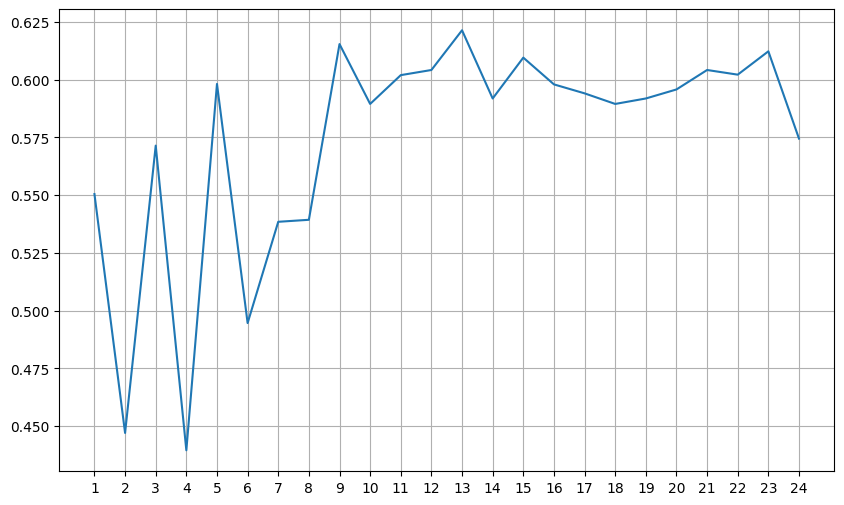

In [30]:
#finding the best k for KNN method using "for"

f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [38]:
#finding the best k for KNN method using Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [39]:
knn_gscv.cv_results_['rank_test_score']

array([24, 22, 23, 21, 18,  9,  1, 11,  6, 13,  5,  7,  2,  3, 16, 17, 10,
       19, 14, 20,  4, 12, 15,  8], dtype=int32)

In [40]:
knn_gscv.best_params_

{'n_neighbors': 7}

In [41]:
knn_gscv.best_score_

0.7422544775485951

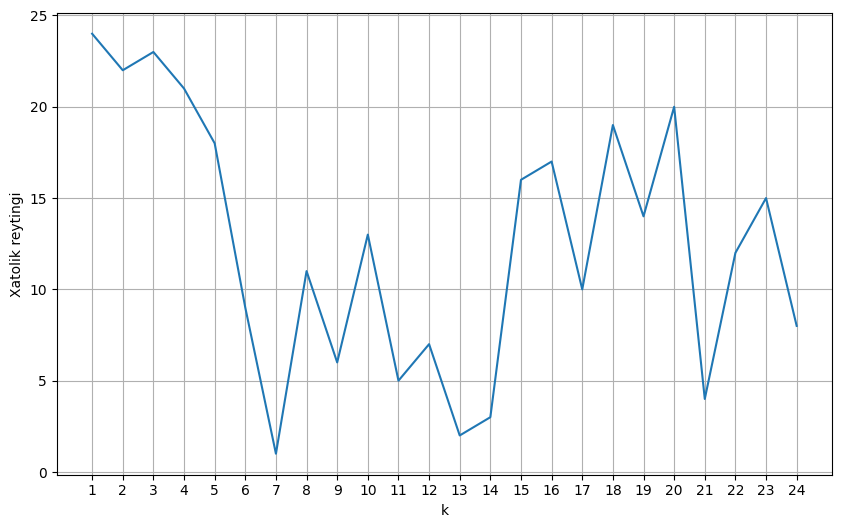

In [42]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [31]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13) # k-ni qiymati(yuqoridagi graphlardan  dan eng yaxshi k bu 13 ga teng!)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [32]:
y_predict = knn.predict(X_test) #prediction

In [33]:
#Find accuracy using JACCARD_INDEX method

from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.4507042253521127

Accurcy of KNN meethod is so poor for the data, 45 percent is toooooooo bad ...,  Let's try other methods

---



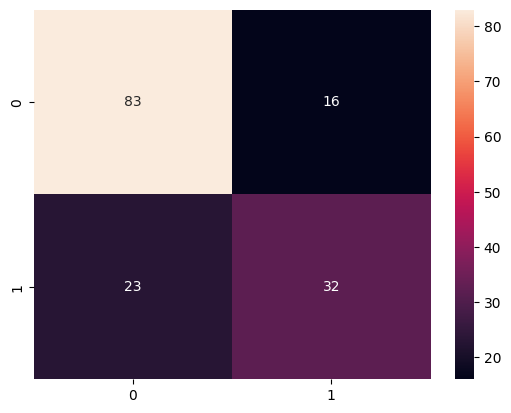

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [35]:
confusion_matrix(y_test, y_predict)

array([[83, 16],
       [23, 32]])

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.6666666666666666
recall=0.5818181818181818
f1=0.6213592233009707
accuracy=0.7467532467532467


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [44]:
#Decision_tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred_dt = tree_model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [47]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.7597402597402597


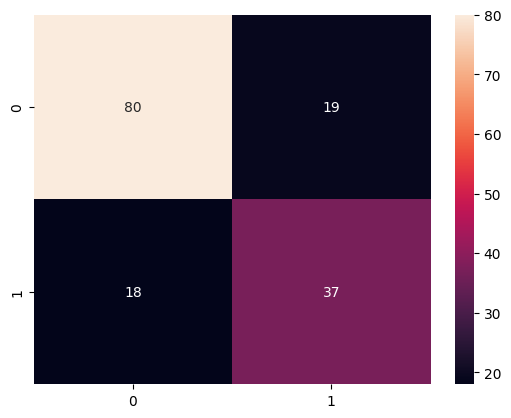

In [60]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
plt.show()

In [53]:
#Random_forest

from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [54]:
print("Random forest's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random forest's Accuracy:  0.8116883116883117


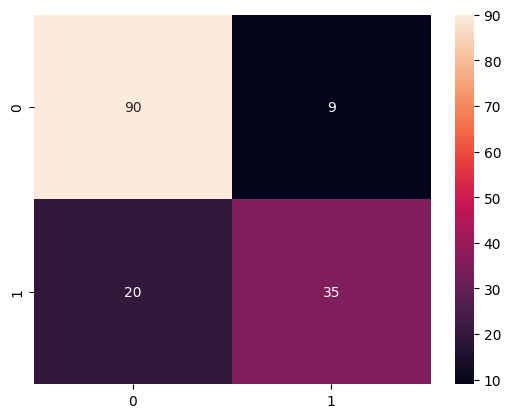

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.show()